# Step 1:  Import a test Image to see if it works

/Users/maycaj/Library/Python/3.9/lib/python/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.1090146154165268, 0.5803923010826111]
    G: [0.0, 0.8132732510566711]
    B: [0.0, 0.7458889484405518]

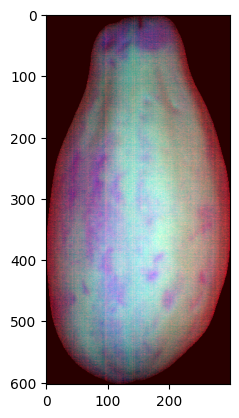

In [24]:
import spectral as sp
hdr = sp.envi.open('/Users/maycaj/Downloads/Papaya/VIS/day_m4_01/papaya_day_m4_01_20_front.hdr', image='/Users/maycaj/Downloads/Papaya/VIS/day_m4_01/papaya_day_m4_01_20_front.bin')
# Read the data from the HDR file
data = hdr.load()

# Visualize the hyperspectral image
sp.imshow(data)

# Step 2: Display image in false RGB
Not sure which bands correspond to which wavelengths. Not sure which camera was used for each picture, but 2/3 of the cameras used have a wavelength from 400 to 1000nm and we know our camera has 224 bands. Setting up a proportion and solving for band number we can caluclate which bands correspond to which wavelengths.

$ band number/(totalbands) = ((redwavelength) - 400)/((highestwavelength)-400) $
- totalbands = 224
- redwavelength=700
- highestwavelength = 1000

- Specim FX10 = 400 to 1000nm region, 100 bands
- INNO-SPEC Redeye 1.7 = 950 to 1700nm
- Corning microHSI 410 Vis-NIR Hyperspectral Sensor = 400 to 1000nm

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.8132732510566711]
    G: [0.0, 0.3830287754535675]
    B: [0.0, 0.17114505171775818]

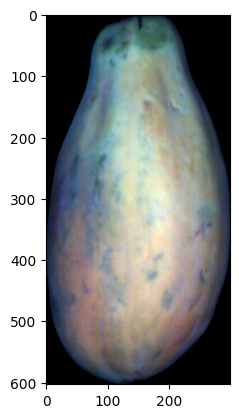

In [25]:
# Define the bands for false RGB
total_bands = 224 #from .hdr file
red_band = 112  
green_band = 46
blue_band = 28


# Create a false RGB image
false_rgb = data[:, :, [red_band, green_band, blue_band]]

# Visualize the false RGB image
sp.imshow(false_rgb)

# Step 3: Try Saving as a Cube File to see if I can load it into Matlab

First answer: Can the ML toolkit easily read .cube files?
I think Karthik was able to write a function to import them, but texted to double check

In [29]:
data.shape

(603, 300, 224)

In [33]:
import numpy as np
from scipy.io import savemat

save_path = '/Users/maycaj/Downloads/hyperspectral_image.mat'
data_to_save = {'hyperspectral_image': data}
savemat(save_path, data_to_save)

# Step 4: Oranize the data into folders based on how it is labelled
Use /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/annotationstrain_only_labeled_v2.json to categorize the fruits into folders based on ripeness_state which contains the following categories:
- unripe
- perfect
- overripe

1. Within the json file we navegate to
annotations --> a number --> ripeness state
2. Find the corresponding id 
annotations --> a number --> id
3. Use the id to find the filepath for the .bin
records --> files --> data_file
4. Convert the .bin file to a .mat variable
5. add the .mat variable to a folder corresponding to the ripeness
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/ripe
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/perfect
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/overripe

Can do this manually a few times as a proof of concept 